<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

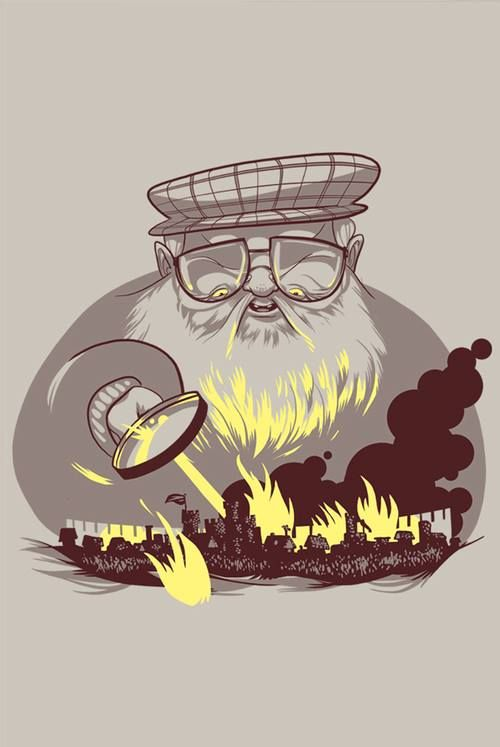

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [5765]:
# !gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
# !gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [5766]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [5767]:
df_test = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')
df = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')

In [5768]:
# df = df_test

**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [5769]:
df['dateOfBirth'] = df.dateOfBirth.fillna(df.dateOfBirth.mean())
df['age'] = df['age'].fillna(18)
# df['age'] = df['age'].fillna(df['age'].median())

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [5770]:
# popular = df.popularity > 0.8
# unpopular = df.popularity < 0.3
# df['isPopular'] = (popular | unpopular).astype(int)

<Axes: >

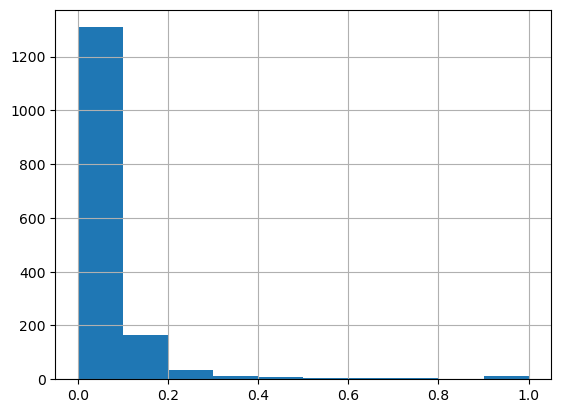

In [5771]:
# df['boolDeadRelations'] = (df.numDeadRelations > 0).astype(int)
df.popularity.hist()

In [5772]:
# cult = {
#     'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
#     'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
#     'Asshai': ["asshai'i", 'asshai'],
#     'Lysene': ['lysene', 'lyseni'],
#     'Andal': ['andal', 'andals'],
#     'Braavosi': ['braavosi', 'braavos'],
#     'Dornish': ['dornishmen', 'dorne', 'dornish'],
#     'Myrish': ['myr', 'myrish', 'myrmen'],
#     'Westermen': ['westermen', 'westerman', 'westerlands'],
#     'Westerosi': ['westeros', 'westerosi'],
#     'Stormlander': ['stormlands', 'stormlander'],
#     'Norvoshi': ['norvos', 'norvoshi'],
#     'Northmen': ['the north', 'northmen'],
#     'Free Folk': ['wildling', 'first men', 'free folk'],
#     'Qartheen': ['qartheen', 'qarth'],
#     'Reach': ['the reach', 'reach', 'reachmen'],
# }

# def unify_culture(name):
#     for unified_name, names in cult.items():
#         if isinstance(name, float):
#             return 'Other'
#         if isinstance(name, str) and name.lower() in [n.lower() for n in names]:
#             return unified_name
#     return name

# df['cult'] = df['culture'].apply(unify_culture)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [5773]:
house_counts = df.house.value_counts()
big_houses = house_counts[house_counts >= 3].index

df['big_house'] = df.house.isin(big_houses).astype(int)
# df['has_heir'] = df.heir.notna().astype(int)

# TO TRY:
# REMOVE dateOfBirth

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

<Axes: >

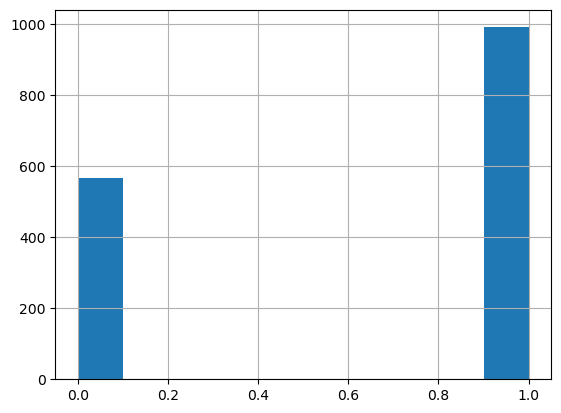

In [5774]:
df['booked'] = df.book4 | df.book5
df.booked.hist()

In [5775]:
incomplete_data = df.isna().mean() > 0.7
underfilled_cols = incomplete_data[incomplete_data].index
underfilled_cols

COLUMNS_TO_DROP = [
    'name',
    'mother',
    'father',
    'house',
    'heir',
    'spouse',
    'isAliveMother',
    'isAliveFather',
    'isAliveSpouse',
    'isAliveHeir',
    'culture',
    'title',
    # 'popularity',
    #
    # 'book1',
    # 'book2',
    # 'book3',
    'book4',
    'book5',
    # 'isMarried',
    # 'isNoble',
]

df.drop(columns=COLUMNS_TO_DROP, inplace=True)

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [5776]:
# cult_counts = df.cult.value_counts()
# rear_cults = cult_counts[cult_counts < 60].index
# df.loc[df.cult.isin(rear_cults), 'cult'] = 'Other'
# df.cult.value_counts()
# df = pd.get_dummies(df, columns=['cult'], drop_first=True, dtype=int)

In [5777]:
# from sklearn.utils.class_weight import compute_class_weight

# class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(df['male']), y=df['male'])
# class_weights_dict = dict(zip(np.unique(df['male']), class_weights))
df.male.value_counts(normalize=True)

male
1    0.59088
0    0.40912
Name: proportion, dtype: float64

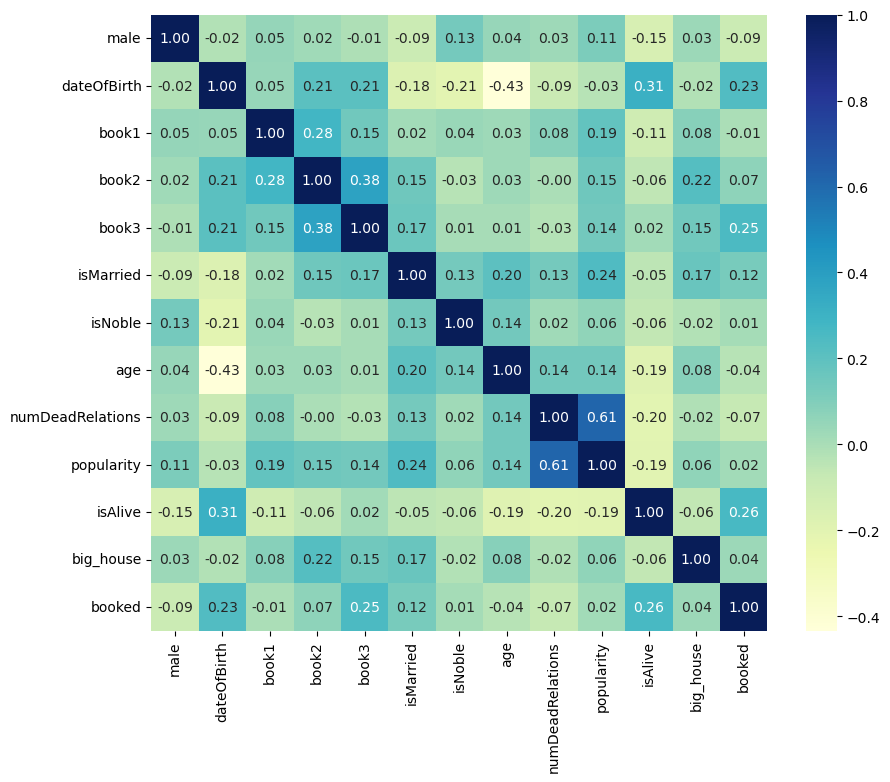

In [5778]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="YlGnBu", fmt=".2f", annot=True, square=True);

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [5779]:
X = df.drop(columns='isAlive').values
y = df.isAlive.values

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [5780]:
from sklearn.model_selection import train_test_split

In [5781]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)     

In [5782]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
)

scaler = MinMaxScaler()
# scaler = StandardScaler()

# scaler.fit(X_train)

# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)

In [5783]:
k_neighbors_classifier = KNeighborsClassifier()
scores = cross_val_score(k_neighbors_classifier, X, y, cv=5)
# print(scores)
selector = SelectKBest(score_func=f_classif, k=12)
selector.fit(X, y)
best_features = selector.get_support()

# X_train = selector.transform(X_train)
scores = cross_val_score(k_neighbors_classifier, X[:, best_features], y, cv=5)
print(scores.mean())

0.8194925385439855


In [5784]:
X_train = X_train[:, best_features]
X_test = X_test[:, best_features]

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier

В качестве примера, импортируем модель `LogisticRegression`

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [5785]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.gaussian_process import GaussianProcessClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

# ОБУЧЕНИЕ

In [5786]:
logistic_regression = LogisticRegression(C=1, max_iter=200)
logistic_regression.fit(X_train, y_train);

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5787]:
random_forest = RandomForestClassifier(n_estimators=250, n_jobs=-1)
random_forest.fit(X_train, y_train);

In [5788]:
ada_boost = AdaBoostClassifier(algorithm='SAMME')
ada_boost.fit(X_train, y_train);

In [5789]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train);

In [5790]:
k_neighbors_classifier = KNeighborsClassifier()
k_neighbors_classifier.fit(X_train, y_train);

In [5791]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train);

In [5792]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train);

In [5793]:
gaussian_process_classifier = GaussianProcessClassifier()
gaussian_process_classifier.fit(X_train, y_train);

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [5794]:
from sklearn.metrics import accuracy_score
PREDICTIONS = []

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [5795]:
y_pred = logistic_regression.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
PREDICTIONS.append((logistic_regression, accuracy))

In [5796]:
y_pred = random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
PREDICTIONS.append((random_forest, accuracy))

In [5797]:
y_pred = ada_boost.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
PREDICTIONS.append((ada_boost, accuracy))

In [5798]:
y_pred = gaussian_nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
PREDICTIONS.append((gaussian_nb, accuracy))

In [5799]:
y_pred = k_neighbors_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
PREDICTIONS.append((k_neighbors_classifier, accuracy))

In [5800]:
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
PREDICTIONS.append((svc, accuracy))

In [5801]:
y_pred = decision_tree_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
PREDICTIONS.append((decision_tree_classifier, accuracy))

In [5802]:
y_pred = gaussian_process_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
PREDICTIONS.append((gaussian_process_classifier, accuracy))

In [5803]:
PREDICTIONS.sort(key=lambda x: x[1], reverse=True)

In [5804]:
for model, accuracy in sorted(PREDICTIONS, key=lambda x: x[1], reverse=True):
    print(f"{accuracy:.4f}:\t{model}")

0.8333:	KNeighborsClassifier()
0.8173:	AdaBoostClassifier(algorithm='SAMME')
0.8173:	GaussianProcessClassifier()
0.8077:	RandomForestClassifier(n_estimators=250, n_jobs=-1)
0.8013:	LogisticRegression(C=1, max_iter=200)
0.7917:	SVC()
0.7788:	GaussianNB()
0.7564:	DecisionTreeClassifier()


Выберите лучшую модель.

In [5718]:
# X_pred = scaler.transform(df.values)


In [5721]:
# Шаг 3. Предсказание на тестовых данных
best_model = PREDICTIONS[0][0]
print(best_model)
y_pred = best_model.predict(df.values)

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [809]:
# !gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /Users/victor/Code/dl-course/lesson_3_basics/submission.csv
100%|██████████████████████████████████████| 2.74k/2.74k [00:00<00:00, 4.52MB/s]


In [5722]:
submission = pd.read_csv("submission.csv", index_col='S.No')

In [5723]:
submission.isAlive = y_pred

Как сохранить измененный Pandas DataFrame в csv файл:

In [5724]:
submission.to_csv("new_submission.csv")